'''
# Downdload Data (about 10 min)
PS C:\Users\USER\Desktop\L1000> aws s3 cp `
>>   s3://lincs-dcic/LINCS-sigs-2021/gctx/cd-coefficient/cp_coeff_mat.gctx `
>>   . `
>>   --no-sign-request
>>
'''
## Tutorial
# https://github.com/cmap/cmapPy/blob/master/tutorials/cmapPy_pandasGEXpress_tutorial.ipynb 

# Data Structure Check

In [1]:
import pandas as pd
from cmapPy.pandasGEXpress.parse import parse
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Signature QC Filtering
sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')

sig_cp = sig_info[sig_info['pert_type'] == 'trt_cp']

mask = (
    (sig_cp['qc_pass'] >= 1) &
    (sig_cp['median_recall_rank_spearman'] <= 5) &
    (sig_cp['cc_q75'] >= 0.2) &
    (sig_cp['pct_self_rank_q25'] <= 5)
)

filtered_sigs = sig_cp.loc[mask, 'sig_id']

# 2) Gene mapping
gene_info = pd.read_csv('geneinfo_beta.txt', sep='\t', dtype=str)
gene_info.set_index('gene_symbol', inplace=True)
genes = ['TMPRSS6'] # Setup Gene 


rids = gene_info.loc[genes, 'gene_id'].tolist()


gctx_fp = "level5_beta_trt_cp_n720216x12328.gctx"

col_meta_df = parse(gctx_fp, col_meta_only=True)
available_cids = set(col_meta_df.index.astype(str))

row_meta_df = parse(gctx_fp, row_meta_only=True)
available_rids = set(row_meta_df.index.astype(str))

print(f'Available Sample Counts: {len(available_rids)}')

# 3) GCTX subset parsing

valid_cids = [cid for cid in filtered_sigs if cid in available_cids]
valid_rids = [rid for rid in rids if rid in available_rids]

gctoo = parse(gctx_fp,
              cid=valid_cids,
              rid=valid_rids
              )

C:\Users\USER\AppData\Local\Temp\ipykernel_11168\1406983732.py:7: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))
c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: er

Available Sample Counts: 12328


c:\Users\USER\anaconda3\envs\moa_llm\lib\site-packages\cmapPy\pandasGEXpress\parse_gctx.py:275: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meta_df = meta_df.apply(lambda x: pd.to_numeric(x, errors="ignore"))


In [2]:
full_df = gctoo.data_df

In [3]:
# 4) Load sig_info metadata for valid sample
filt_sig = sig_info.set_index('sig_id', drop=False)
valid_sig_meta = filt_sig.loc[valid_cids]

print(f'Sample Counts: {len(valid_cids)}')
print(f'Compound Counts: {len(valid_sig_meta["cmap_name"].unique())}')
print(f'Cell Line Counts: {len(valid_sig_meta["cell_iname"].unique())}')


Sample Counts: 102750
Compound Counts: 9635
Cell Line Counts: 161


In [4]:
# Lung cancer
print((valid_sig_meta['cell_iname'] == 'HEPG2').value_counts())
print((valid_sig_meta['cell_iname'] == 'HUH7').value_counts())

# Normal 
print((valid_sig_meta['cell_iname'] == 'PHH').value_counts())
print((valid_sig_meta['cell_iname'] == 'HUVEC').value_counts())

cell_iname
False    99263
True      3487
Name: count, dtype: int64
cell_iname
False    102636
True        114
Name: count, dtype: int64
cell_iname
False    102683
True         67
Name: count, dtype: int64
cell_iname
False    102103
True        647
Name: count, dtype: int64


In [5]:
sel_cols = ['pert_dose', 'pert_time', 'cell_mfc_name', 'cmap_name']

meta_df = valid_sig_meta.loc[full_df.columns, sel_cols].T

full_df = pd.concat([full_df, meta_df], axis=0)
full_df

cid,ABY001_A375_XH:BRD-A61304759:0.625:24,ABY001_A375_XH:BRD-A61304759:10:24,ABY001_A375_XH:BRD-A61304759:10:3,ABY001_A375_XH:BRD-A61304759:2.5:24,ABY001_A375_XH:BRD-A61304759:2.5:3,ABY001_A375_XH:BRD-A90490067:0.625:24,ABY001_A375_XH:BRD-A90490067:10:24,ABY001_A375_XH:BRD-K19687926:10:24,ABY001_A375_XH:BRD-K21680192:0.625:24,ABY001_A375_XH:BRD-K21680192:10:24,...,TSAI002_NPC-6_XH:C646:10,TSAI002_NPC-6_XH:CI-994:10,TSAI002_NPC-6_XH:COMPE:2,TSAI002_NPC-6_XH:DAC-3:5,TSAI002_NPC-6_XH:SAHA:2.5,TSAI002_NPC-6_XH:SRT3657:5,TSAI002_NPC-8_XH:C646:10,TSAI002_NPC-8_XH:CI-994:10,TSAI002_NPC-8_XH:COMPE:2,TSAI002_NPC-8_XH:SAHA:2.5
164656,0.84205,0.993747,-0.001014,0.81044,0.546673,0.41064,-0.931598,1.167222,2.37835,3.458559,...,1.086783,-1.408814,0.600715,-0.648133,0.09049,-0.002192,0.407213,0.459982,1.284306,-0.882341
pert_dose,0.625,10.0,10.0,2.5,2.5,0.625,10.0,10.0,0.625,10.0,...,10.0,10.0,2.0,5.0,2.5,5.0,10.0,10.0,2.0,2.5
pert_time,24.0,24.0,3.0,24.0,3.0,24.0,24.0,24.0,24.0,24.0,...,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0,-666.0
cell_mfc_name,A375,A375,A375,A375,A375,A375,A375,A375,A375,A375,...,NPC-6,NPC-6,NPC-6,NPC-6,NPC-6,NPC-6,NPC-8,NPC-8,NPC-8,NPC-8
cmap_name,tanespimycin,tanespimycin,tanespimycin,tanespimycin,tanespimycin,fulvestrant,fulvestrant,lapatinib,mitoxantrone,mitoxantrone,...,C646,CI-994,compe,DAC-3,saha,SRT-3657,C646,CI-994,compe,saha


In [6]:
# Sorting with each cell line
HEPG2 = full_df.T[full_df.T['cell_mfc_name'] == 'HEPG2']
HUH7 = full_df.T[full_df.T['cell_mfc_name'] == 'HUH7']
PHH = full_df.T[full_df.T['cell_mfc_name'] == 'PHH']
HUVEC = full_df.T[full_df.T['cell_mfc_name'] == 'HUVEC']

In [7]:
HEPG2.to_excel('HEPG2.xlsx')
HUH7.to_excel('HUH7.xlsx')
PHH.to_excel('PHH.xlsx')
HUVEC.to_excel('HUVEC.xlsx')

## Visualization drug resposne

In [8]:
def plot_drug_response_raw(
    df, response_col, drug_name,
    drug_col='cmap_name',
    dose_col='pert_dose',
    time_col='pert_time',
    figsize=(16,12)
):
    df_drug = df[df[drug_col]==drug_name].copy()
    if df_drug.empty:
        raise ValueError(f"No data for {drug_name}")

   
    df_drug['dose_num'] = df_drug[dose_col].astype(float)
    df_drug['time_num'] = df_drug[time_col].astype(float)

    fig, ax = plt.subplots(figsize=figsize)
    for t in sorted(df_drug['time_num'].unique()):
        sel = df_drug[df_drug['time_num']==t]
        ax.scatter(sel['dose_num'], sel[response_col],
                   label=f"{int(t)} h", alpha=0.6, edgecolor='k', s=60)

    ax.set_xscale('log')
    ax.set_xlabel(f"Dose ({dose_col})")
    ax.set_ylabel(response_col)
    ax.set_title(f"{drug_name} response ({len(df_drug)} replicates)")

    
    doses = sorted(df_drug['dose_num'].unique())
    ax.set_xticks(doses)

    
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(
        lambda x, _: f"{x:g}"  
    ))

    ax.legend(title=f"Time ({time_col})")
    plt.tight_layout()
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

    return df_drug


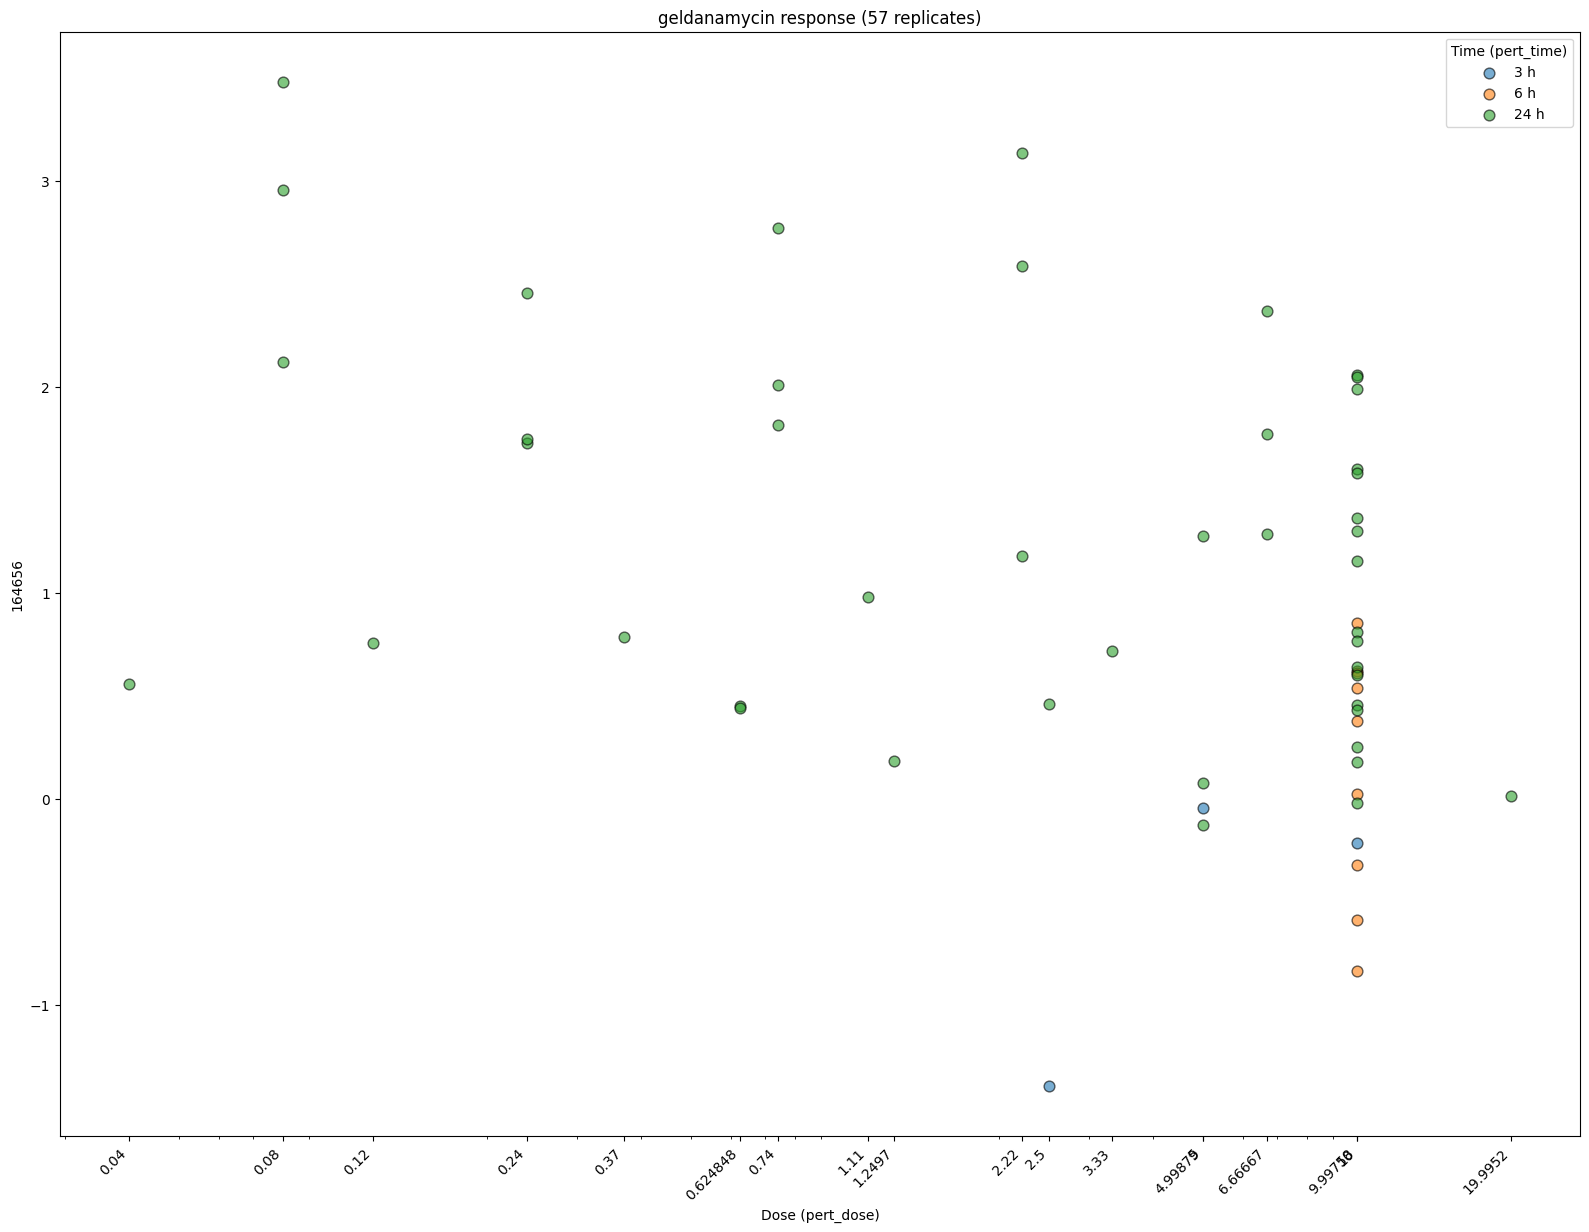

,164656,pert_dose,pert_time,cell_mfc_name,cmap_name,dose_num,time_num
cid,,,,,,,
CPC008_HEPG2_6H:BRD-A19500257:10,0.619183,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC009_HEPG2_6H:BRD-A19500257:10,0.851233,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC010_HEPG2_6H:BRD-A19500257:10,0.378897,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC013_HEPG2_6H:BRD-A19500257:10,-0.58753,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC014_HEPG2_6H:BRD-A19500257:10,-0.837308,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC016_HEPG2_6H:BRD-A19500257:10,0.02489,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC017_HEPG2_6H:BRD-A19500257:10,0.535703,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CPC019_HEPG2_6H:BRD-A19500257:10,-0.323181,10.0,6.0,HEPG2,geldanamycin,10.000000,6.0
CRCGN005_HEPG2_24H:BRD-A19500257:0.08,2.9557,0.08,24.0,HEPG2,geldanamycin,0.080000,24.0


In [9]:
plot_drug_response_raw(
    HEPG2,
    response_col='164656',      
    drug_name='geldanamycin',     
    drug_col='cmap_name',         
    dose_col='pert_dose',        
    time_col='pert_time'         
)

## Check Replicate reliability

In [12]:

def compute_group_stats(
    df: pd.DataFrame,
    response_col: str,
    dose_col: str = 'pert_dose',
    time_col: str = 'pert_time'
) -> pd.DataFrame:
    """
    Compute descriptive statistics for each dose-time combination.

    Returns a DataFrame indexed by (dose, time) with columns:
    count, mean, std, min, max, range.
    """
    # Ensure numeric
    df = df.copy()
    df['dose_num'] = df[dose_col].astype(float)
    df['time_num'] = df[time_col].astype(float)

    stats = (
        df
        .groupby(['dose_num','time_num'])[response_col]
        .agg(count='count', mean='mean', std='std', min='min', max='max')
    )
    stats['range'] = stats['max'] - stats['min']
    return stats


def get_top_variation(
    stats: pd.DataFrame,
    metric: str = 'std',
    top_n: int = 1
) -> pd.DataFrame:
    """
    Return top_n dose-time groups sorted by specified variation metric (std or range).
    """
    if metric not in ('std','range'):
        raise ValueError("metric must be 'std' or 'range'")
    return stats.sort_values(metric, ascending=True).head(top_n)


def plot_group_distribution(
    df: pd.DataFrame,
    response_col: str,
    dose: float,
    time: float,
    dose_col: str = 'pert_dose',
    time_col: str = 'pert_time',
    figsize: tuple = (10,6)
) -> None:
    """
    Plot scatter and boxplot for a specific dose-time group.
    """
    sub = df.copy()
    sub['dose_num'] = sub[dose_col].astype(float)
    sub['time_num'] = sub[time_col].astype(float)
    sel = sub[(sub['dose_num']==dose) & (sub['time_num']==time)]

    if sel.empty:
        print(f"No records for {dose} µM, {time} h")
        return

    # Scatter
    plt.figure(figsize=figsize)
    sns.scatterplot(x=sel['dose_num'], y=sel[response_col], s=80, edgecolor='k')
    plt.title(f"Scatter: {dose} µM, {time} h (n={len(sel)})")
    plt.xlabel(f"Dose ({dose_col})")
    plt.ylabel(response_col)
    plt.show()

    # Boxplot
    plt.figure(figsize=figsize)
    sns.boxplot(x=sel['dose_num'], y=sel[response_col], width=0.4)
    plt.title(f"Boxplot: {dose} µM, {time} h")
    plt.xlabel(f"Dose ({dose_col})")
    plt.ylabel(response_col)
    plt.show()


def analyze_and_plot_variation(
    df: pd.DataFrame,
    response_col: str,
    drug_name: str,
    drug_col: str = 'cmap_name',
    dose_col: str = 'pert_dose',
    time_col: str = 'pert_time',
    top_n: int = 1
) -> pd.DataFrame:
    """
    Compute group stats for a specific drug, print top variation groups,
    and plot distributions for these groups.

    Returns the stats DataFrame for the drug.
    """
    # Filter drug data
    df_drug = df[df[drug_col]==drug_name]
    if df_drug.empty:
        raise ValueError(f"No data for drug '{drug_name}' in column '{drug_col}'")

    # Compute stats and get top variation
    stats = compute_group_stats(df_drug, response_col, dose_col, time_col)
    top = get_top_variation(stats, metric='std', top_n=top_n)
    print("Top variation groups:")
    print(top)

    # Plot each top group
    for (dose, time) in top.index:
        plot_group_distribution(df_drug, response_col, dose, time, dose_col, time_col)

    return stats


Top variation groups:
                   count      mean       std     min     max   range
dose_num time_num                                                   
0.624848 24.0          2    0.4448  0.006647  0.4401  0.4495  0.0094
0.240000 24.0          3  1.976433  0.413988  1.7266  2.4543  0.7277
0.740000 24.0          3    2.1991  0.504867  1.8168  2.7714  0.9546


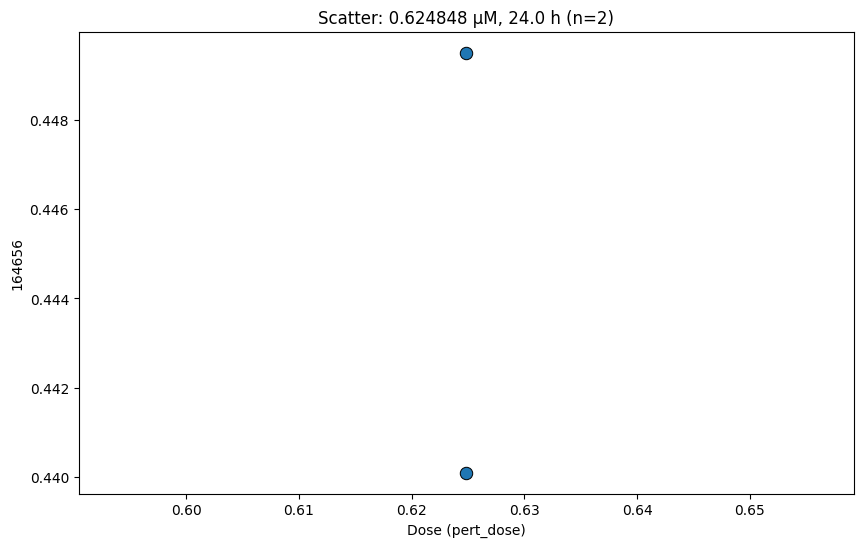

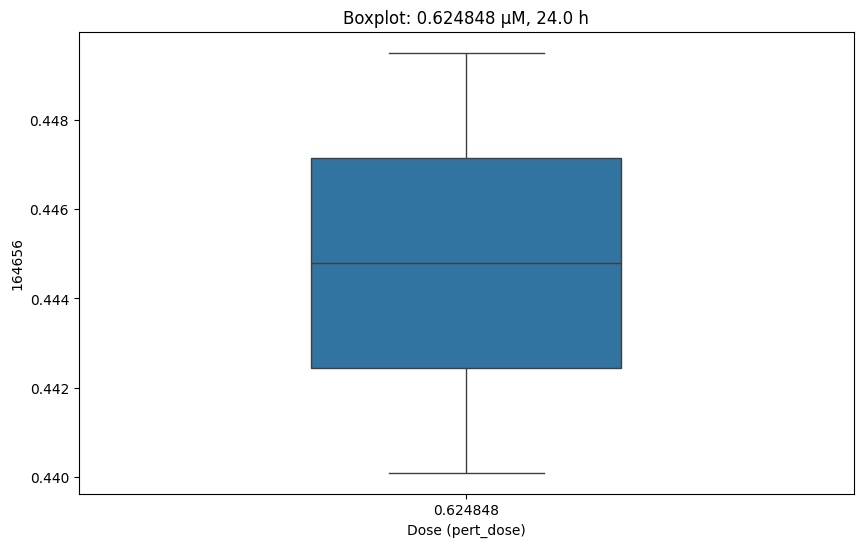

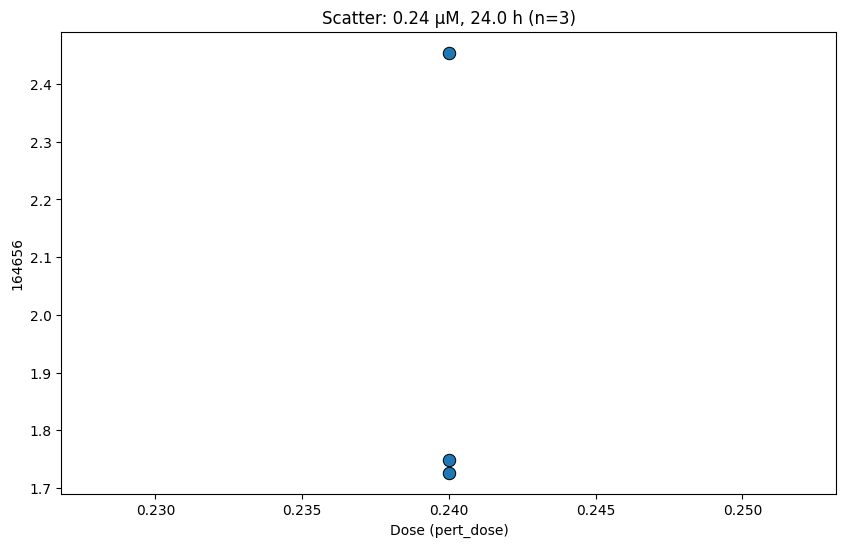

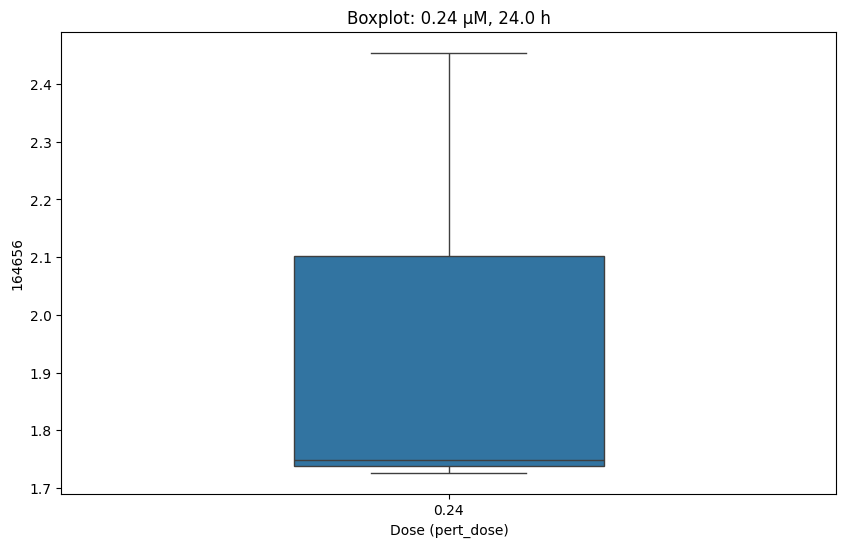

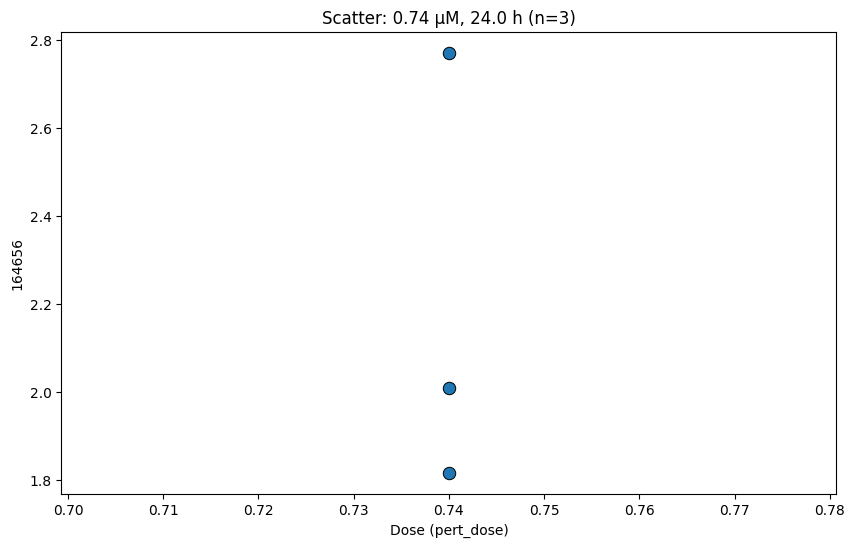

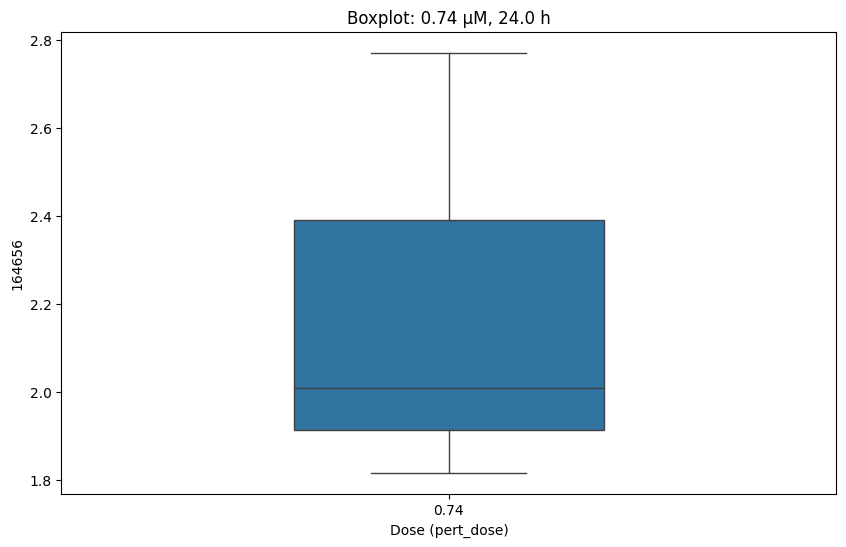

,,count,mean,std,min,max,range
dose_num,time_num,,,,,,
0.040000,24.0,1,0.556254,NaN,0.556254,0.556254,0.0
0.080000,24.0,3,2.852667,0.686176,2.1208,3.4815,1.3607
0.120000,24.0,1,0.757246,NaN,0.757246,0.757246,0.0
0.240000,24.0,3,1.976433,0.413988,1.7266,2.4543,0.7277
0.370000,24.0,1,0.78548,NaN,0.78548,0.78548,0.0
0.624848,24.0,2,0.4448,0.006647,0.4401,0.4495,0.0094
0.740000,24.0,3,2.1991,0.504867,1.8168,2.7714,0.9546
1.110000,24.0,1,0.97745,NaN,0.97745,0.97745,0.0
1.249700,24.0,1,0.1822,NaN,0.1822,0.1822,0.0


In [13]:
analyze_and_plot_variation(
    HEPG2,
    response_col='164656',
    drug_name='geldanamycin',
    drug_col='cmap_name',
    dose_col='pert_dose',
    time_col='pert_time',
    top_n=3
)

# CMAP LINCS 2020 (https://clue.io/data/CMap2020#LINCS2020)

In [2]:
# File Structure Checking

file_path = 'level5_beta_trt_cp_n720216x12328.gctx'  

with h5py.File(file_path, 'r') as f:
    # Root Group
    print("Root groups:", list(f.keys()))
    
    # '0' Inside Groups
    g0 = f['0']
    print("Groups under '0':", list(g0.keys()))
    
    # Data Matrix
    data = g0['DATA']
    
    matrix = data['0/matrix']
    print("Coefficient matrix shape:", matrix.shape)
    
    # Meta Data(Gene ID, Signiture ID)
    row_ids = g0['META']['ROW']['id'][:]
    col_ids = g0['META']['COL']['id'][:]
    print(f"Number of genes (rows): {len(row_ids)}")
    print(f"Number of signatures (cols): {len(col_ids)}")
    print("First 5 gene IDs:", [x.decode() for x in row_ids[:5]])
    print("First 5 signature IDs:", [x.decode() for x in col_ids[:5]])

Root groups: ['0']
Groups under '0': ['DATA', 'META']
Coefficient matrix shape: (720216, 12328)
Number of genes (rows): 12328
Number of signatures (cols): 720216
First 5 gene IDs: ['10', '100', '1000', '10000', '10001']
First 5 signature IDs: ['ABY001_A375_XH:BRD-A61304759:0.625:24', 'ABY001_A375_XH:BRD-A61304759:0.625:3', 'ABY001_A375_XH:BRD-A61304759:10:24', 'ABY001_A375_XH:BRD-A61304759:10:3', 'ABY001_A375_XH:BRD-A61304759:2.5:24']


In [3]:
# Data Structure
with h5py.File(file_path, 'r') as f:
    print(list(f['0/META/ROW'].keys()))
    

['id']


In [4]:
def decode_if_bytes(x):
    return x.decode('utf-8') if isinstance(x, (bytes, bytearray)) else x

with h5py.File(file_path, 'r') as f:
    g0 = f['0']

    # Row metadata → DataFrame
    row_meta = {k: g0['META']['ROW'][k][:] for k in g0['META']['ROW'].keys()}
    df_row = pd.DataFrame(row_meta)

    # COL metadata → DataFrame
    col_meta = {k: g0['META']['COL'][k][:] for k in g0['META']['COL'].keys()}
    df_col = pd.DataFrame(col_meta)

# bytes decoding
df_row = df_row.applymap(decode_if_bytes)
df_col = df_col.applymap(decode_if_bytes)

# save files
df_row.to_csv('row_metadata(beta).csv', index=False, encoding='utf-8-sig')
df_col.to_csv('col_metadata(beta).csv', index=False, encoding='utf-8-sig')

C:\Users\USER\AppData\Local\Temp\ipykernel_27408\985432860.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_row = df_row.applymap(decode_if_bytes)
C:\Users\USER\AppData\Local\Temp\ipykernel_27408\985432860.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_col = df_col.applymap(decode_if_bytes)


In [5]:
info = pd.read_csv('instinfo_beta.txt', sep='\t')
info

C:\Users\USER\AppData\Local\Temp\ipykernel_27408\3402120056.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  info = pd.read_csv('instinfo_beta.txt', sep='\t')


,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_itime,pert_time_unit,cell_mfc_name,pert_mfc_id,...,sample_id,pert_type,cell_iname,qc_pass,dyn_range,inv_level_10,build_name,failure_mode,project_code,cmap_name
0,b11,NaN,20.00000,uL,20 uL,72.0,72 h,h,VCAP,ERG_11,...,ERG013_VCAP_72H_X3_B11:O14,trt_sh,VCAP,0.0,4.20788,4220.5,NaN,dyn_range,ERG,ERG
1,b10,NaN,1.00000,uL,1 uL,96.0,96 h,h,U2OS,TRCN0000072237,...,TAK004_U2OS_96H_X2_B10_DUO52HI53LO:D10,ctl_vector,U2OS,0.0,4.73906,1462.0,NaN,inv_level_10,TAK,LACZ
2,b12,NaN,0.10000,ng/ml,0.1 ng/ml,2.0,2 h,h,HEPG2,SOD3,...,CYT001_HEPG2_2H_X2_B12:N12,trt_lig,HEPG2,1.0,6.79642,3038.0,NaN,NaN,CYT,SOD3
3,b12,NaN,150.00000,ng,150 ng,48.0,48 h,h,HEK293T,ENTRY00543,...,HSF038_HEK293T_48H_X2_B12:M01,trt_oe,HEK293T,0.0,23.79710,1642.0,NaN,inv_level_10,HSF,PDGFRA
4,f3b5,6.660,5.33000,uM,6.66 uM,24.0,24 h,h,A375,BRD-K79781870,...,DOS043_A375_24H_X1_F3B5_DUO52HI53LO:D17,trt_cp,A375,0.0,6.78867,1558.0,NaN,"inv_level_10,qc_iqr",DOS,BRD-K79781870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026455,b40,0.125,0.15625,uM,0.125 uM,4.0,4 h,h,BJAB,BRD-K07955840,...,AICHI002_BJAB_4H_X1.A2_B40:N04,trt_cp,BJAB,1.0,14.02630,4804.0,NaN,NaN,AICHI,PF-05212384
3026456,f1b3,0.125,0.15625,uM,0.125 uM,24.0,24 h,h,MCF7,BRD-K64606589,...,HDAC001_MCF7_24H_X1_F1B3_DUO52HI53LO:H10,trt_cp,MCF7,1.0,5.14642,3304.0,NaN,NaN,HDAC,apicidin
3026457,f1b3,0.125,0.15625,uM,0.125 uM,24.0,24 h,h,PC3,BRD-K61894884,...,HDAC001_PC3_24H_X1_F1B3_DUO52HI53LO:N04,trt_cp,PC3,1.0,8.70554,2986.0,NaN,NaN,HDAC,BRD-K61894884
3026458,f1b5,0.125,0.12350,uM,0.125 uM,24.0,24 h,h,MCF7,BRD-K57545991,...,RAD001_MCF7_24H_X3_F1B5_DUO52HI53LO:L07,trt_cp,MCF7,0.0,6.05089,2378.0,NaN,qc_iqr,RAD,enalapril


trt_cp	compounds
trt_sh	shRNA
trt_oe	over-expression
trt_xpr	CRISPR
trt_misc	other treatments (ex: ligands, siRNA, etc)
ctl	negative controls (ex: DMSO, untreated)

In [60]:
info['pert_type'].unique()

array(['trt_sh', 'ctl_vector', 'trt_lig', 'trt_oe', 'trt_cp', 'trt_aby',
       'trt_xpr', 'ctl_x', 'ctl_vehicle', 'ctl_untrt', 'trt_si'],
      dtype=object)

In [75]:
total_info = info[info['pert_type'].isin(['trt_cp'])]

In [135]:
sel_id = total_info['sample_id']

In [122]:
total_info.columns

Index(['bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit',
       'pert_idose', 'pert_time', 'pert_itime', 'pert_time_unit',
       'cell_mfc_name', 'pert_mfc_id', 'det_plate', 'det_well', 'rna_plate',
       'rna_well', 'count_mean', 'count_cv', 'qc_f_logp', 'qc_iqr', 'qc_slope',
       'pert_id', 'sample_id', 'pert_type', 'cell_iname', 'qc_pass',
       'dyn_range', 'inv_level_10', 'build_name', 'failure_mode',
       'project_code', 'cmap_name'],
      dtype='object')

In [132]:
len(total_info['sample_id'].unique())

1805898

In [6]:
sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')
sig_info

C:\Users\USER\AppData\Local\Temp\ipykernel_27408\1022747257.py:1: DtypeWarning: Columns (0,3,4,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  sig_info = pd.read_csv('siginfo_beta.txt', sep='\t')


,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
0,b17,NaN,100.0,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
1,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
2,b15,2.5,2.5,uM,2.5 uM,24 h,24.0,h,HT29,BRD-K70511574,...,HT29,E18|E22,ABY001_HT29_XH_X1_B15,ABY001_HT29_XH_X1_B15:E18|ABY001_HT29_XH_X1_B1...,NaN,ABY,HMN-214,0,1.0,0.0
3,b18,10.0,10.0,uM,10 uM,3 h,3.0,h,HME1,BRD-K81418486,...,HME1,F19,LTC002_HME1_3H_X1_B18,LTC002_HME1_3H_X1_B18:F19,NaN,LTC,vorinostat,0,0.0,0.0
4,b15,10.0,10.0,uM,10 uM,3 h,3.0,h,H1975,BRD-A61304759,...,H1975,P01|P05|P09,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:P01|ABY001_H1975_XH_X1_...,NaN,ABY,tanespimycin,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201939,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K48853221,...,HCC515,K01,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:K01|DOSVAL001_HCC5...,NaN,DOSVAL,BRD-K48853221,1,1.0,0.0
1201940,b18,10.0,10.0,uM,10 uM,24 h,24.0,h,HCC515,BRD-K90382497,...,HCC515,O03,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:O03|DOSVAL001_HCC5...,NaN,DOSVAL,GW-843682X,0,1.0,0.0
1201941,b19,20.0,20.0,uM,20 uM,24 h,24.0,h,HCC515,BRD-K45785972,...,HCC515,M22,DOSVAL002_HCC515_24H_X1.L2_B19|DOSVAL002_HCC51...,DOSVAL002_HCC515_24H_X1.L2_B19:M22|DOSVAL002_H...,NaN,DOSVAL,BRD-K45785972,0,1.0,0.0
1201942,b19,4.0,5.0,uM,4 uM,24 h,24.0,h,A375,BRD-K28513938,...,A375,E09,DOSVAL004_A375_24H_X1.A2_B19|DOSVAL004_A375_24...,DOSVAL004_A375_24H_X1.A2_B19:E09|DOSVAL004_A37...,NaN,DOSVAL,BRD-K28513938,0,1.0,0.0


In [7]:
sig_info.columns

Index(['bead_batch', 'nearest_dose', 'pert_dose', 'pert_dose_unit',
       'pert_idose', 'pert_itime', 'pert_time', 'pert_time_unit',
       'cell_mfc_name', 'pert_mfc_id', 'nsample', 'cc_q75', 'ss_ngene', 'tas',
       'pct_self_rank_q25', 'wt', 'median_recall_rank_spearman',
       'median_recall_rank_wtcs_50', 'median_recall_score_spearman',
       'median_recall_score_wtcs_50', 'batch_effect_tstat',
       'batch_effect_tstat_pct', 'is_hiq', 'qc_pass', 'pert_id', 'sig_id',
       'pert_type', 'cell_iname', 'det_wells', 'det_plates', 'distil_ids',
       'build_name', 'project_code', 'cmap_name', 'is_exemplar_sig',
       'is_ncs_sig', 'is_null_sig'],
      dtype='object')

In [8]:
mask = (
    (sig_info['qc_pass'] >= 1) &
    (sig_info['median_recall_rank_spearman'] <= 5) &
    (sig_info['cc_q75'] >= 0.2) &
    (sig_info['pct_self_rank_q25'] <= 5) &
    (sig_info['nsample'] >= 3)
)
highq = sig_info[mask]


highq

,bead_batch,nearest_dose,pert_dose,pert_dose_unit,pert_idose,pert_itime,pert_time,pert_time_unit,cell_mfc_name,pert_mfc_id,...,cell_iname,det_wells,det_plates,distil_ids,build_name,project_code,cmap_name,is_exemplar_sig,is_ncs_sig,is_null_sig
0,b17,NaN,100.00000,ug/ml,100 ug/ml,336 h,336.0,h,N8,BRD-U44432129,...,NAMEC8,H05|H06|H07|H08,MET001_N8_XH_X1_B17,MET001_N8_XH_X1_B17:H05|MET001_N8_XH_X1_B17:H0...,NaN,MET,BRD-U44432129,0,0.0,0.0
1,b15,10.00,10.00000,uM,10 uM,3 h,3.0,h,A549,BRD-K81418486,...,A549,L04|L08|L12,ABY001_A549_XH_X1_B15,ABY001_A549_XH_X1_B15:L04|ABY001_A549_XH_X1_B1...,NaN,ABY,vorinostat,0,1.0,0.0
5,b15,10.00,10.00000,uM,10 uM,24 h,24.0,h,H1975,BRD-K85606544,...,H1975,A15|A19|A23,ABY001_H1975_XH_X1_B15,ABY001_H1975_XH_X1_B15:A15|ABY001_H1975_XH_X1_...,NaN,ABY,neratinib,0,0.0,0.0
11,b22,0.12,0.10000,uM,0.12 uM,6 h,6.0,h,A375,BRD-A55453956,...,A375,H13|H15|H17,LPROT002_A375_6H_X1_B22,LPROT002_A375_6H_X1_B22:H13|LPROT002_A375_6H_X...,NaN,LPROT,compound-e,1,1.0,0.0
12,b32,1.11,1.00000,uM,1.11 uM,6 h,6.0,h,YAPC,BRD-K83189926,...,YAPC,M14|M16|M18,LPROT004_YAPC_6H_X1_B32,LPROT004_YAPC_6H_X1_B32:M14|LPROT004_YAPC_6H_X...,NaN,LPROT,UNC-1215,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201929,b18,10.00,9.99164,uM,10 uM,24 h,24.0,h,HT29,BRD-K11624501,...,HT29,P16,DOSVAL001_HT29_24H_X1_B18|DOSVAL001_HT29_24H_X...,DOSVAL001_HT29_24H_X1_B18:P16|DOSVAL001_HT29_2...,NaN,DOSVAL,BRD-K11624501,1,1.0,0.0
1201930,b18,4.00,5.00000,uM,4 uM,24 h,24.0,h,HT29,BRD-K74514084,...,HT29,K10,DOSVAL001_HT29_24H_X1_B18|DOSVAL001_HT29_24H_X...,DOSVAL001_HT29_24H_X1_B18:K10|DOSVAL001_HT29_2...,NaN,DOSVAL,pazopanib,0,1.0,0.0
1201936,b19,10.00,10.00000,uM,10 uM,24 h,24.0,h,HCC515,BRD-K75693278,...,HCC515,L05,DOSVAL006_HCC515_24H_X1_B19|DOSVAL006_HCC515_2...,DOSVAL006_HCC515_24H_X1_B19:L05|DOSVAL006_HCC5...,NaN,DOSVAL,SA-1458985,1,1.0,0.0
1201937,b18,10.00,10.00000,uM,10 uM,24 h,24.0,h,HCC515,BRD-K19540840,...,HCC515,G15,DOSVAL001_HCC515_24H_X1_B18|DOSVAL001_HCC515_2...,DOSVAL001_HCC515_24H_X1_B18:G15|DOSVAL001_HCC5...,NaN,DOSVAL,saracatinib,0,1.0,0.0


In [14]:
(sig_info['cell_mfc_name'] == 'TMPRSS6').value_counts()

cell_mfc_name
False    1201944
Name: count, dtype: int64